## Pauta P2 Auxiliar 4: Cortes de Gomory y Branch and Bound

### Cortes de Gomory: Consiste en cortar planos que contengan soluciones no enteras 

* i) Relajar el problema, i.e pasar las variables enteras a reales, y resolver el problema relajado 

* ii) Si la resolución del problema relajado tiene sólo variables enteras, se termina el algoritmo dado que siempre se cumple que (si estamos minimizando):

\begin{equation}
x^{*}_{RP} \leq x^{*}_{entero}
\end{equation}

* iii) En caso de que la solución no sea entera, es necesario realizar un corte que excluya esa solución pero no las siguientes soluciones enteras 

Por ejemplo, supongamos que resolvimos el problema relajado mediante el algoritmo simplex, tenemos de esta forma que recordando el algoritmo, dónde B es la matriz de las variables básicas y N las de las no básicas que vienen desde la matriz A del poliedro asociado:

\begin{equation} 
Bx_{B} + Nx_{N} = b \\
B^{-1}Bx_{B} + B^{-1}Nx_{N} = B^{-1}b \\
x_{B} + B^{-1}Nx_{N} = B^{-1}b \\
x_{B} + \hat A_{N} x_{N} = \hat b
\end{equation}
                                       
Sea $a_{ij}$ un elemento de esta nueva matriz $\hat A_{N}$, se tiene que a partir de la ecuación anterior encontraremos la posibilidad de elegir cortes a partir de la siguiente ecuación para una variable básica $i$:

\begin{equation}
x_i + \sum_{j \in N} \lfloor a_{ij}\rfloor x_j \leq \hat b_i
\end{equation}

Donde $\lfloor \rfloor$ representa la función parte entera suelo, es decir, el número entero más cercano que sea menor al número real

* iv) Agregamos el corte al problema relajado y volvemos a iniciar el algoritmo 

### a) 

Se tiene el problema a resolver mediante planos cortantes

\begin{equation}
    \begin{aligned}
        (P) \hspace{0.8cm}   \text{max } \hspace{0.4cm} z= 3x_1 + 4x_2 \\
        \text{s.a.} \hspace{1cm}  x_1 + 3x_2 &\leq 20 \\
        2x_1 - x_2 &\leq 4 \\
        x_1, x_2 &\in \mathbb Z^+
    \end{aligned}
\end{equation}  

Primero es necesario pasar el problema a forma estándar y relajarlo

\begin{equation}
    \begin{aligned}
        (PR1) \hspace{0.8cm}   \text{min } \hspace{0.4cm} z= -3x_1 - 4x_2 \\
        \text{s.a.} \hspace{1cm}  x_1 + 3x_2 + x_3 = 20 \\
        2x_1 - x_2 + x_4 = 4 \\
        x_1, x_2, x_3, x_4 &\in \mathbb R^+
    \end{aligned}
\end{equation}  

De forma gráfica se ve más o menos así: 

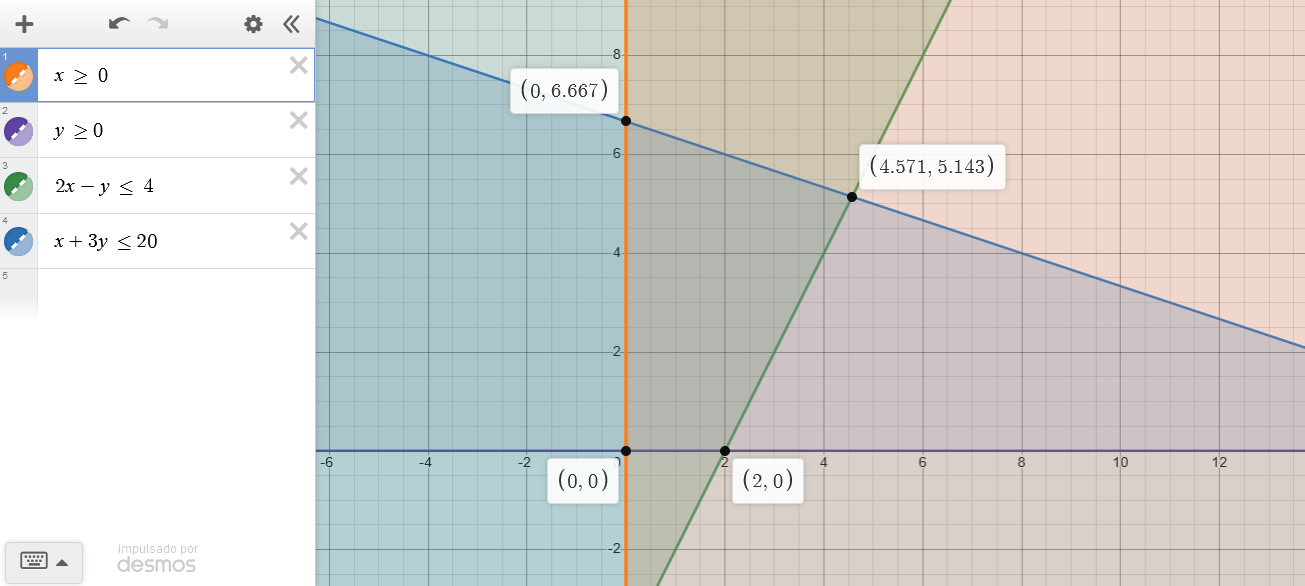

In [1]:
#Resolución del problema relajado 
using JuMP
using Cbc

PR1 = Model(Cbc.Optimizer)

@variable(PR1, x[1:4] >=0)

@constraint(PR1, x[1]+3x[2] + x[3] == 20)
@constraint(PR1, 2x[1]-x[2] + x[4] == 4)
@objective(PR1, Min, -3*x[1]-4*x[2])
set_silent(PR1)

optimize!(PR1)


println("La solución al problema es ", value.(x))

println("La funcion objetivo toma un valor de ", objective_value(PR1))

La solución al problema es [4.571428571428572, 5.142857142857142, 0.0, 0.0]
La funcion objetivo toma un valor de -34.285714285714285
Presolve 0 (-2) rows, 0 (-4) columns and 0 (-6) elements
Optimal - objective value -34.285714
After Postsolve, objective -34.285714, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective -34.28571429 - 0 iterations time 0.022, Presolve 0.02


Notamos que el resultado de las variables básicas del problema relajado nos queda: 

\begin{equation}
x_B = \{x_1,x_2\} \wedge x_N = \{x_3,x_4\} \\
x = (4.57,5.14,0,0) 
\end{equation}

Recordando el problema relajado

\begin{equation}
    \begin{aligned}
        (PR1) \hspace{0.8cm}   \text{min } \hspace{0.4cm} z= -3x_1 - 4x_2 \\
        \text{s.a.} \hspace{1cm}  x_1 + 3x_2 + x_3 = 20 \\
        2x_1 - x_2 + x_4 = 4 \\
        x_1, x_2, x_3, x_4 &\in \mathbb R^+
    \end{aligned}
\end{equation}  

Se tiene que: 

\begin{equation}
B= \begin{bmatrix}
1 & 3\\
2 & -1
\end{bmatrix};
N= \begin{bmatrix}
1 & 0\\
0 & 1
\end{bmatrix};
b=\begin{bmatrix}
20 \\
4  
\end{bmatrix}
\end{equation}

\begin{equation}
B^{-1}= \begin{bmatrix}
\frac{1}{7} & \frac{3}{7}\\
\frac{2}{7} & \frac{1}{7}
\end{bmatrix};
\hat A_N= \begin{bmatrix}
\frac{1}{7} & \frac{3}{7}\\
\frac{2}{7} & \frac{1}{7}
\end{bmatrix};
\hat b=\begin{bmatrix}
\frac{32}{7}\\
\frac{36}{7}  
\end{bmatrix}
\end{equation}

* Recordando que $x_B + \hat A_Nx_N =  \hat b$ se tiene

\begin{equation}
    \begin{pmatrix}
        x_1^*\\
        x_2^*
    \end{pmatrix}
+  
\begin{pmatrix}
        \frac{1}{7} & \frac{3}{7} \\
        \frac{2}{7} & \frac{1}{7}
    \end{pmatrix}
\begin{pmatrix}
        x_3^* \\
        x_4^*
\end{pmatrix}
=
\begin{pmatrix}
        \frac{32}{7}\\
        \frac{36}{7}  
\end{pmatrix}
\end{equation}

Recordando la expresión: 

\begin{equation}
x_i + \sum_{j \in N} \lfloor a_{ij}\rfloor x_j \leq \hat b_i
\end{equation}

Elegimos una de las ecuaciones para cada variable básica para realizar el corte, supongamos que elegimos la primera (propuesto tomar la otra ecuación para realizar el corte):

\begin{equation}
x_1^* + \lfloor \frac{1}{7} \rfloor \cdot x_3^* + \lfloor \frac{3}{7} \rfloor \cdot x_4^* = \lfloor \frac{32}{7} \rfloor \\
x_1^* + 0\cdot x_3^* + 0\cdot x_4^* \leq 4 \\
x_1^* \leq 4
\end{equation}

Agregamos la nueva restricción en forma estándar: $x_1 + x_5 = 4$

Nuestro nuevo problema ahora es: 

\begin{equation}
    \begin{aligned}
        (PR2) \hspace{0.8cm}   \text{min } \hspace{0.4cm} z= -3x_1 - 4x_2 \\
        \text{s.a.} \hspace{1cm}  x_1 + 3x_2 + x_3 = 20 \\
        2x_1 - x_2 + x_4 = 4 \\
        x_1 + x_5 = 4 \\
        x_1, x_2, x_3, x_4,x_5 &\in \mathbb R^+
    \end{aligned}
\end{equation} 

¿Que hicimos gráficamente?: Generamos un nuevo poliedro del problema relajado dónde excluimos la solución no entera calculada con anterioridad 

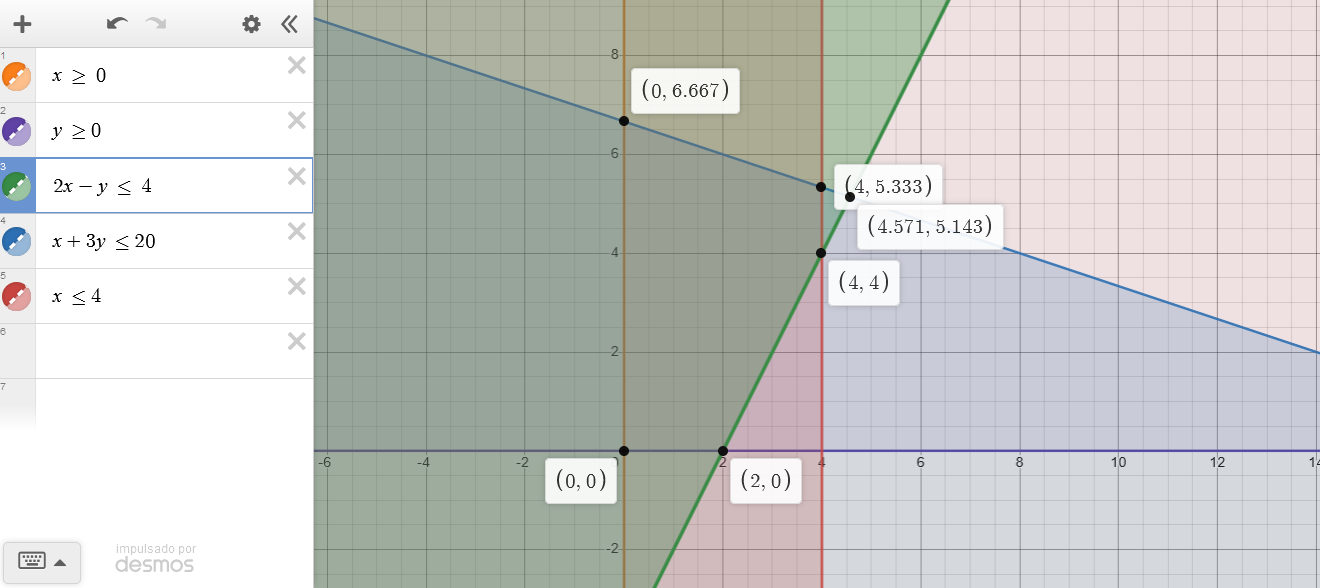



In [2]:
#Resolvemos el nuevo problema relajado 

PR2 = Model(Cbc.Optimizer)

@variable(PR2, x[1:5] >=0)

@constraint(PR2, x[1]+3x[2] + x[3] == 20)
@constraint(PR2, 2x[1]-x[2] + x[4] == 4)
@constraint(PR2, x[1] + x[5] == 4)
@objective(PR2, Min, -3*x[1]-4*x[2])
set_silent(PR2)

optimize!(PR2)


println("La solución al problema es ", value.(x))

println("La funcion objetivo toma un valor de ", objective_value(PR2))

La solución al problema es [3.999999999999999, 5.333333333333333, 0.0, 1.3333333333333348, 0.0]
La funcion objetivo toma un valor de -33.33333333333333
Presolve 0 (-3) rows, 0 (-5) columns and 0 (-8) elements
Optimal - objective value -33.333333
After Postsolve, objective -33.333333, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective -33.33333333 - 0 iterations time 0.002, Presolve 0.00


Volvemos a realizar el procedimiento de corte de Gomory:

\begin{equation}
    \begin{aligned}
        (P) \hspace{0.8cm}   \text{min } \hspace{0.4cm} z= -3x_1 - 4x_2 \\
        \text{s.a.} \hspace{1cm}  x_1 + 3x_2 + x_3 = 20 \\
        2x_1 - x_2 + x_4 = 4 \\
        x_1 + x_5 = 4 \\
        x_1, x_2, x_3, x_4,x_5 &\in \mathbb Z^+
    \end{aligned}
\end{equation} 

Se tiene que $x_B$ = $(x_1,x_2,x_4)$ y $x_N$ = $(x_3,x_5)$: 

\begin{equation}
B= \begin{bmatrix}
1 & 3 & 0\\
2 & -1 & 1\\
1 & 0 & 0\\
\end{bmatrix};
N= \begin{bmatrix}
1 & 0\\
0 & 0\\
0 & 1
\end{bmatrix};
b=\begin{bmatrix}
20 \\
4\\
4
\end{bmatrix}
\end{equation}

\begin{equation}
B^{-1}= \begin{bmatrix}
0 & 0 & 1\\
\frac{1}{3} & 0 & \frac{-1}{3}\\
\frac{1}{3} & 0 & \frac{-7}{3}
\end{bmatrix};
\hat A_N= \begin{bmatrix}
0 & 1\\
\frac{1}{3} & \frac{-1}{3}\\
\frac{1}{3} & \frac{-7}{3}
\end{bmatrix};
\hat b=\begin{bmatrix}
4\\
\frac{16}{3}\\
\frac{4}{3}
\end{bmatrix}
\end{equation}

* Recordando que $x_B + \hat A_Nx_N =  \hat b$ se tiene

\begin{equation}
    \begin{pmatrix}
        x_1^*\\
        x_2^*\\
        x_4^*
    \end{pmatrix}
+  
\begin{pmatrix}
        0 & 1\\
        \frac{1}{3} & \frac{-1}{3}\\
        \frac{1}{3} & \frac{-7}{3}
    \end{pmatrix}
\begin{pmatrix}
        x_3^* \\
        x_5^*
\end{pmatrix}
=
\begin{pmatrix}
        4\\
        \frac{16}{3}\\
        \frac{4}{3}  
\end{pmatrix}
\end{equation}

Recordando la expresión: 

\begin{equation}
x_i + \sum_{j \in N} \lfloor a_{ij}\rfloor x_j \leq \hat b_i
\end{equation}

Elegimos una de las ecuaciones para cada variable básica para realizar el corte, en este caso elegimos $x_2$ (por intuición podríamos notar que esa variable en el problema relajado dió 5.3, siendo necesario cortar) 

\begin{equation}
x_2^* + \lfloor \frac{1}{3} \rfloor \cdot x_3^* + \lfloor \frac{-1}{3} \rfloor \cdot x_5^* = \lfloor \frac{16}{3} \rfloor \\
x_2^* + 0\cdot x_3^* - 1\cdot x_5^* \leq 5 \\
x_2^* - x_5^* \leq 5
\end{equation}

Agregamos la nueva restricción en forma estándar: $x_2 - x_5 + x_6 = 5$

Con ello resolvemos para el nuevo problema relajado:


\begin{equation}
    \begin{aligned}
        (PR3) \hspace{0.8cm}   \text{min } \hspace{0.4cm} z= -3x_1 - 4x_2 \\
        \text{s.a.} \hspace{1cm}  x_1 + 3x_2 + x_3 = 20 \\
        2x_1 - x_2 + x_4 = 4 \\
        x_1 + x_5 = 4 \\
        x_2 - x_5 + x_6 = 5\\
        x_1, x_2, x_3, x_4,x_5,x_6 &\in \mathbb R^+
    \end{aligned}
\end{equation} 

In [3]:
#Resolvemos el nuevo problema relajado 

PR3 = Model(Cbc.Optimizer)

@variable(PR3, x[1:6] >=0)

@constraint(PR3, x[1]+3x[2] + x[3] == 20)
@constraint(PR3, 2x[1]-x[2] + x[4] == 4)
@constraint(PR3, x[1] + x[5] == 4)
@constraint(PR3, x[2] - x[5] + x[6] == 5)
@objective(PR3, Min, -3*x[1]-4*x[2])
set_silent(PR3)

optimize!(PR3)


println("La solución al problema es ", value.(x))

println("La funcion objetivo toma un valor de ", objective_value(PR3))

La solución al problema es [3.5000000000000004, 5.499999999999999, 0.0, 2.4999999999999982, 0.49999999999999956, 0.0]
La funcion objetivo toma un valor de -32.5
Presolve 3 (-1) rows, 2 (-4) columns and 6 (-5) elements
0  Obj 0 Dual inf 6.999998 (2)
2  Obj -32.5
Optimal - objective value -32.5
After Postsolve, objective -32.5, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective -32.5 - 2 iterations time 0.052, Presolve 0.00


La tercera es la vencida vamos por otro Corte de Gomory:

\begin{equation}
    \begin{aligned}
        (P) \hspace{0.8cm}   \text{min } \hspace{0.4cm} z= -3x_1 - 4x_2 \\
        \text{s.a.} \hspace{1cm}  x_1 + 3x_2 + x_3 = 20 \\
        2x_1 - x_2 + x_4 = 4 \\
        x_1 + x_5 = 4 \\
        x_2 - x_5 + x_6 = 5\\
        x_1, x_2, x_3, x_4,x_5,x_6 &\in \mathbb Z^+
    \end{aligned}
\end{equation} 

Se tiene que $x_B$ = $(x_1,x_2,x_4,x_5)$ y $x_N$ = $(x_3,x_6)$: 

\begin{equation}
B= \begin{bmatrix}
1 & 3 & 0 & 0\\
2 & -1 & 1 & 0\\
1 & 0 & 0 & 1\\
0 & 1 & 0 & -1
\end{bmatrix};
N= \begin{bmatrix}
1 & 0\\
0 & 0\\
0 & 0\\
0 & 1\\
\end{bmatrix};
b=\begin{bmatrix}
20 \\
4\\
4\\
5
\end{bmatrix}
\end{equation}

\begin{equation}
B^{-1}= \begin{bmatrix}
\frac{-1}{2} & 0 & \frac{3}{2} & \frac{3}{2}\\
\frac{1}{2} & 0 & \frac{-1}{2} & \frac{-1}{2}\\
\frac{3}{2} & 1 & \frac{-7}{2} & \frac{-7}{2}\\
\frac{1}{2} & 0 & \frac{-1}{2} & \frac{-3}{2}\\
\end{bmatrix};
\hat A_N= \begin{bmatrix}
\frac{-1}{2} & \frac{3}{2}\\
\frac{1}{2} & \frac{-1}{2}\\
\frac{3}{2} & \frac{-7}{2}\\
\frac{1}{2} & \frac{-3}{2}\\
\end{bmatrix};
\hat b=\begin{bmatrix}
\frac{7}{2}\\
\frac{11}{2}\\
\frac{5}{2}\\
\frac{1}{2}
\end{bmatrix}
\end{equation}

* Recordando que $x_B + \hat A_Nx_N =  \hat b$ se tiene

\begin{equation}
    \begin{pmatrix}
        x_1^*\\
        x_2^*\\
        x_4^*\\
        x_5^*
    \end{pmatrix}
+  
\begin{pmatrix}
        \frac{-1}{2} & \frac{3}{2}\\
        \frac{1}{2} & \frac{-1}{2}\\
        \frac{3}{2} & \frac{-7}{2}\\
        \frac{1}{2} & \frac{-3}{2}\\
    \end{pmatrix}
\begin{pmatrix}
        x_3^* \\
        x_6^*
\end{pmatrix}
=
\begin{pmatrix}
        \frac{7}{2}\\
        \frac{11}{2}\\
        \frac{5}{2}\\
        \frac{1}{2}
\end{pmatrix}
\end{equation}

Recordando la expresión: 

\begin{equation}
x_i + \sum_{j \in N} \lfloor a_{ij}\rfloor x_j \leq \hat b_i
\end{equation}

Elegimos una de las ecuaciones para cada variable básica para realizar el corte, en este caso elegimos $x_2$ (por intuición podríamos elegir $x_1$ o $x_2$) 

\begin{equation}
x_2^* + \lfloor \frac{1}{2} \rfloor \cdot x_3^* + \lfloor \frac{-1}{2} \rfloor \cdot x_6^* = \lfloor \frac{11}{2} \rfloor \\
x_2^* + 0\cdot x_3^* - 1\cdot x_6^* \leq 5 \\
x_2^* - x_6^* \leq 5
\end{equation}

Agregamos la nueva restricción en forma estándar: $x_2 - x_6 + x_7 = 5$

Con ello resolvemos para el nuevo problema relajado:

\begin{equation}
    \begin{aligned}
        (PR4) \hspace{0.8cm}   \text{min } \hspace{0.4cm} z= -3x_1 - 4x_2 \\
        \text{s.a.} \hspace{1cm}  x_1 + 3x_2 + x_3 = 20 \\
        2x_1 - x_2 + x_4 = 4 \\
        x_1 + x_5 = 4 \\
        x_2 - x_5 + x_6 = 5\\
        x_2 - x_6 + x_7 = 5\\
        x_1, x_2, x_3, x_4,x_5,x_6,x_7 &\in \mathbb R^+
    \end{aligned}
\end{equation}


In [4]:
#Resolvemos el nuevo problema relajado 

PR4 = Model(Cbc.Optimizer)

@variable(PR4, x[1:7] >=0)

@constraint(PR4, x[1]+3x[2] + x[3] == 20)
@constraint(PR4, 2x[1]-x[2] + x[4] == 4)
@constraint(PR4, x[1] + x[5] == 4)
@constraint(PR4, x[2] - x[5] + x[6] == 5)
@constraint(PR4, x[2] - x[6] + x[7] == 5)
@objective(PR4, Min, -3*x[1]-4*x[2])
set_silent(PR4)

optimize!(PR4)


println("La solución al problema es ", value.(x))

println("La funcion objetivo toma un valor de ", objective_value(PR4))

La solución al problema es [4.0, 5.0, 1.0, 1.0, 0.0, 0.0, 0.0]
La funcion objetivo toma un valor de -32.0
Presolve 4 (-1) rows, 3 (-4) columns and 9 (-5) elements
0  Obj 0 Primal inf 8.999999 (1) Dual inf 6.999998 (2)
2  Obj -32
Optimal - objective value -32
After Postsolve, objective -32, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective -32 - 2 iterations time 0.002, Presolve 0.00


Finalmente, llegamos a que todos los valores de las variables son enteros, luego se termina el algoritmo! 

### Branch and Bound: Generar subproblemas del problema original como ramas que se van cortando

* i) Resolvemos el problema relajado 

* ii) Elegimos una variable dónde hacer el branching, generando dos subproblemas 

* iii) Resolvemos cada uno de los subproblemas, dónde si tenemos un problema infactible cortamos de inmediato la rama, en caso de que los dos tengan óptimo, se elige el mejor valor para seguir haciendo branching 

* iv) El método no tiene criterios de términos que de forma teórica nos puedan asegurar llegar a una solución óptima, por lo que es posible seguir haciendo un mini-branching a una solución que creamos suficiente para ver si somos capaces de mejorarla. 





### b) Resolvemos el mismo problema

Se tiene el problema a resolver mediante Branch and Bound

\begin{equation}
    \begin{aligned}
        (P) \hspace{0.8cm}   \text{max } \hspace{0.4cm} z= 3x_1 + 4x_2 \\
        \text{s.a.} \hspace{1cm}  x_1 + 3x_2 &\leq 20 \\
        2x_1 - x_2 &\leq 4 \\
        x_1, x_2 &\in \mathbb Z^+
    \end{aligned}
\end{equation}  

Planteamos el problema relajado

\begin{equation}
    \begin{aligned}
        (P0) \hspace{0.8cm}   \text{max } \hspace{0.4cm} z= 3x_1 + 4x_2 \\
        \text{s.a.} \hspace{1cm}  x_1 + 3x_2 &\leq 20 \\
        2x_1 - x_2 &\leq 4 \\
        x_1, x_2 &\in \mathbb R^+
    \end{aligned}
\end{equation}  

Gráficamente se ve así:

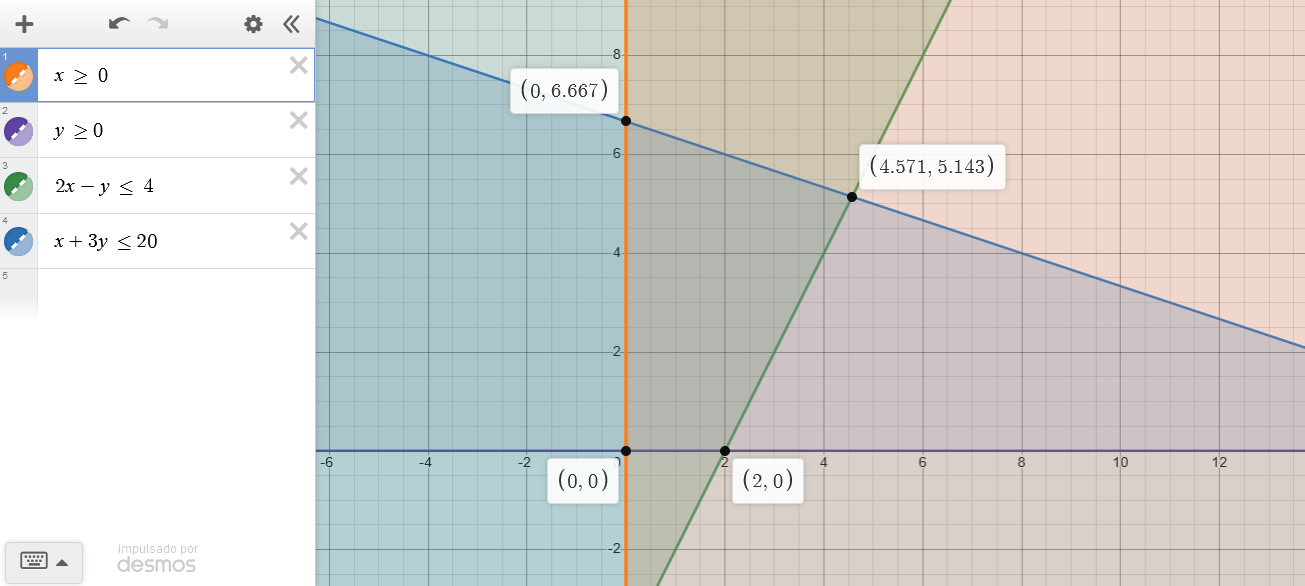

In [5]:
#Resolución del problema relajado 
P0 = Model(Cbc.Optimizer)

@variable(P0, x[1:2] >=0)

@constraint(P0, x[1]+3x[2] <= 20)
@constraint(P0, 2x[1]-x[2] <= 4)
@objective(P0, Max, 3*x[1]+4*x[2])
set_silent(P0)

optimize!(P0)


println("La solución al problema es ", value.(x))

println("La funcion objetivo toma un valor de ", objective_value(P0))

La solución al problema es [4.571428571428572, 5.142857142857142]
La funcion objetivo toma un valor de 34.285714285714285
Presolve 0 (-2) rows, 0 (-2) columns and 0 (-4) elements
Optimal - objective value 34.285714
After Postsolve, objective 34.285714, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 34.28571429 - 0 iterations time 0.002, Presolve 0.00


Podemos realizar el branching en cualquiera de las dos variables, tomemos por ejemplo $x_1$, de esta manera generamos dos sub-problemas con dos restricciones nuevas respectivamente en cada uno de ellos: $x_1 \geq 5$ y $x_1 \leq 4$

### i) Primer subproblema P1

\begin{equation}
    \begin{aligned}
        (P1) \hspace{0.8cm}   \text{max } \hspace{0.4cm} z= 3x_1 + 4x_2 \\
        \text{s.a.} \hspace{1cm}  x_1 + 3x_2 &\leq 20 \\
        2x_1 - x_2 &\leq 4 \\
        x_1 \geq 5\\ 
        x_1, x_2 &\in \mathbb R^+
    \end{aligned}
\end{equation}  

Graficamente se ve así: Es posible apreciar que es infactible 

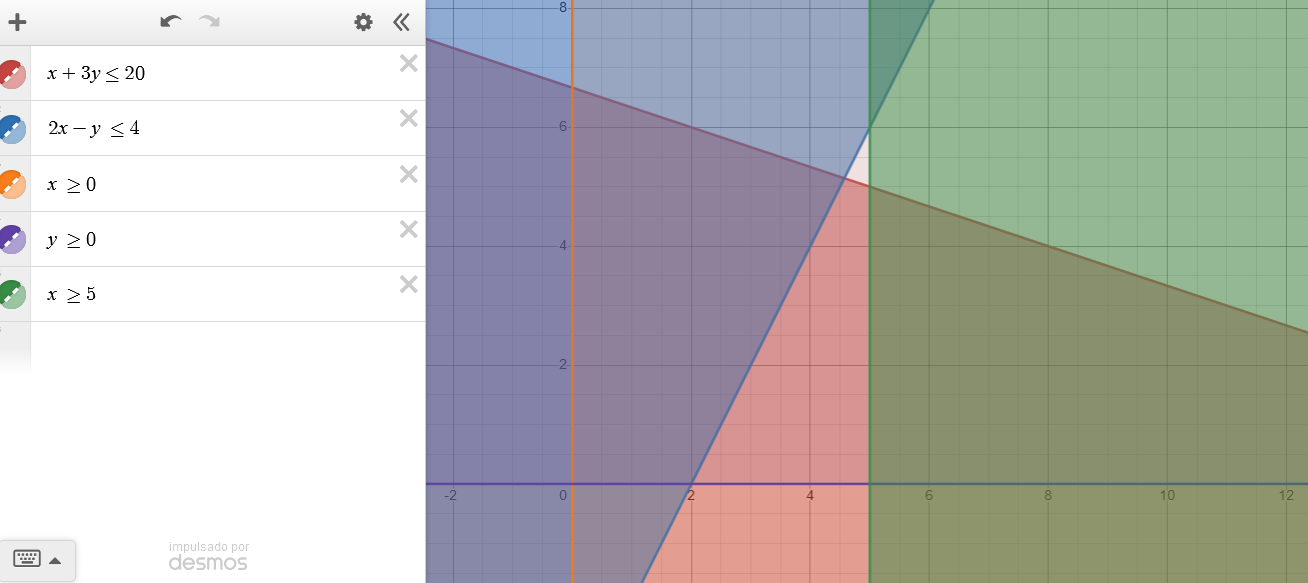



### ii) Segundo subproblema P2

\begin{equation}
    \begin{aligned}
        (P2) \hspace{0.8cm}   \text{max } \hspace{0.4cm} z= 3x_1 + 4x_2 \\
        \text{s.a.} \hspace{1cm}  x_1 + 3x_2 &\leq 20 \\
        2x_1 - x_2 &\leq 4 \\
        x_1 \leq 4\\ 
        x_1, x_2 &\in \mathbb R^+
    \end{aligned}
\end{equation}  

Graficamente se ve así


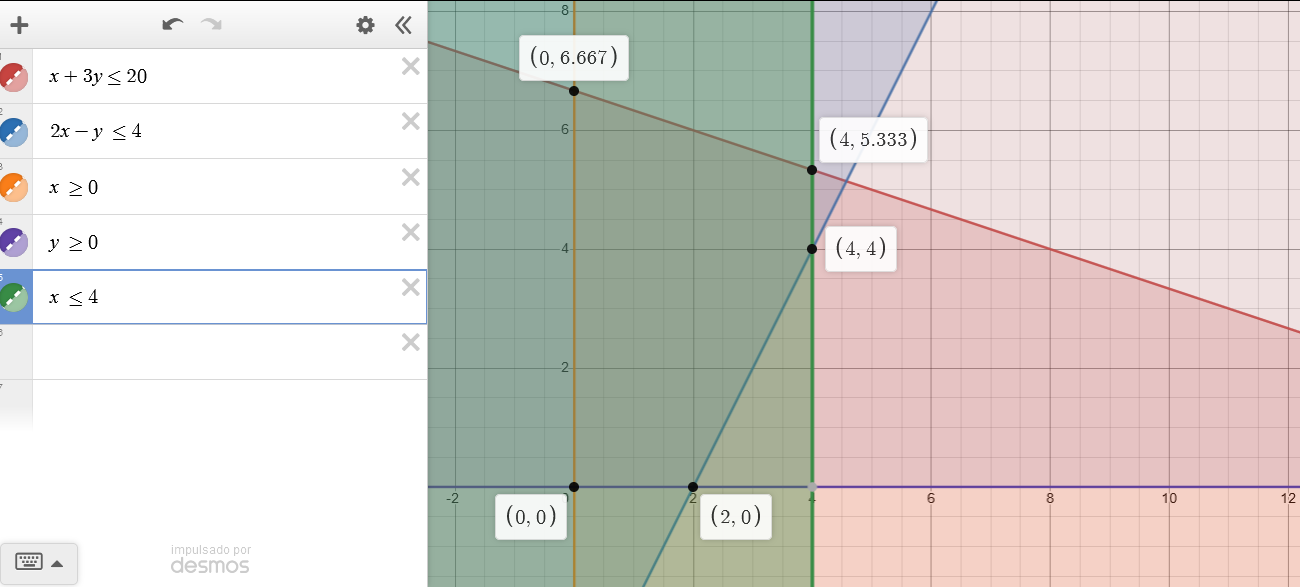

In [6]:
#Resolución de P1
P1 = Model(Cbc.Optimizer)

@variable(P1, x[1:2] >=0)

@constraint(P1, x[1]+3x[2] <= 20)
@constraint(P1, 2x[1]-x[2] <= 4)
@constraint(P1,x[1] >= 5)
@objective(P1, Max, 3*x[1]+4*x[2])
set_silent(P1)
optimize!(P1)



Presolve determined that the problem was infeasible with tolerance of 1e-08
Analysis indicates model infeasible or unbounded
0  Obj -0 Primal inf 4.9999999 (1) Dual inf 6.9999998 (2)
2  Obj 34.285714 Primal inf 0.42857133 (1)
Primal infeasible - objective value 34.285714
PrimalInfeasible objective 34.28571429 - 2 iterations time 0.002


In [7]:
#Resolución de P2
P2 = Model(Cbc.Optimizer)

@variable(P2, x[1:2] >=0)

@constraint(P2, x[1]+3x[2] <= 20)
@constraint(P2, 2x[1]-x[2] <= 4)
@constraint(P2,x[1] <= 4)
@objective(P2, Max, 3*x[1]+4*x[2])
set_silent(P2)
optimize!(P2)

println("La solución al problema es ", value.(x))

println("La funcion objetivo toma un valor de ", objective_value(P2))

La solución al problema es [4.0, 5.333333333333333]
La funcion objetivo toma un valor de 33.33333333333333
Presolve 0 (-3) rows, 0 (-2) columns and 0 (-5) elements
Optimal - objective value 33.333333
After Postsolve, objective 33.333333, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 33.33333333 - 0 iterations time 0.002, Presolve 0.00


A partir de la rama del problema P2, notamos que $x_2$ aún tiene valores no enteros, luego realizamos el branching en $x_2$, generando dos nuevos subproblemas con dos restricciones nuevas respectivamente para cada uno de ellos: $x_2 \geq 6$ y $x_1 \leq 5$

### iii) Tercer subproblema P3

\begin{equation}
    \begin{aligned}
        (P3) \hspace{0.8cm}   \text{max } \hspace{0.4cm} z= 3x_1 + 4x_2 \\
        \text{s.a.} \hspace{1cm}  x_1 + 3x_2 &\leq 20 \\
        2x_1 - x_2 &\leq 4 \\
        x_1 \leq 4\\
        x_2 \geq 6\\
        x_1, x_2 &\in \mathbb R^+
    \end{aligned}
\end{equation}  

Gráficamente se ve así: 

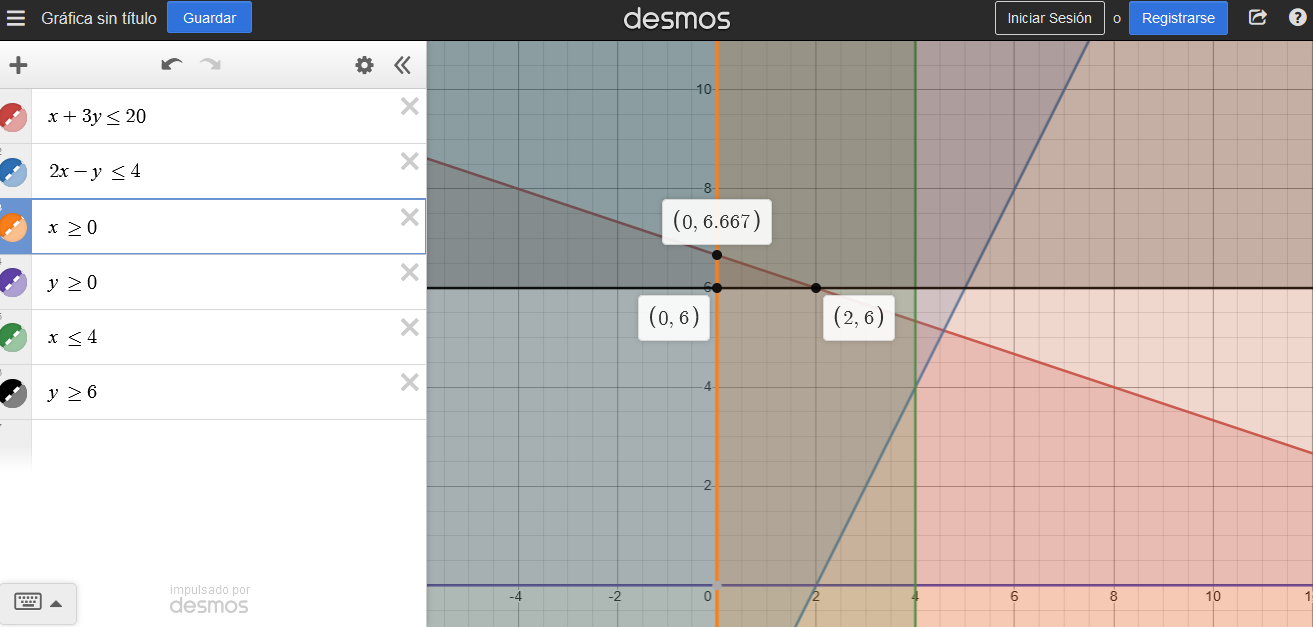

### iv) Cuarto Subproblema P4

\begin{equation}
    \begin{aligned}
        (P4) \hspace{0.8cm}   \text{max } \hspace{0.4cm} z= 3x_1 + 4x_2 \\
        \text{s.a.} \hspace{1cm}  x_1 + 3x_2 &\leq 20 \\
        2x_1 - x_2 &\leq 4 \\
        x_1 \leq 4\\
        x_2 \leq 5\\
        x_1, x_2 &\in \mathbb R^+
    \end{aligned}
\end{equation}  



Gráficamente se ve así:

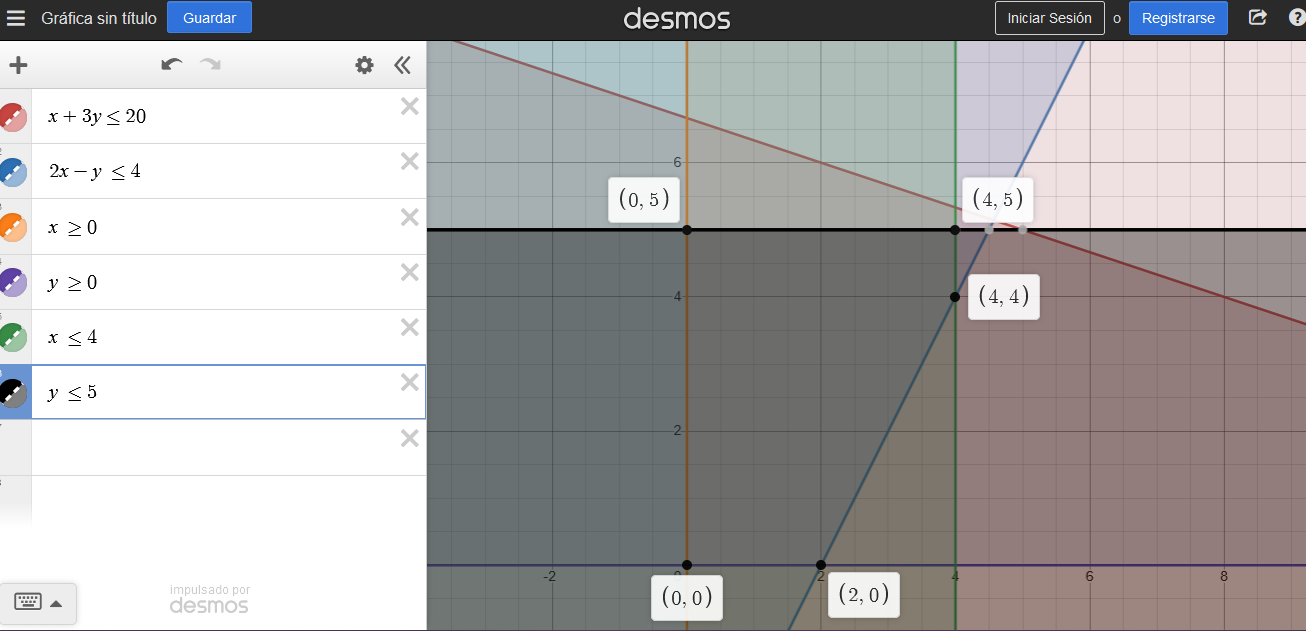

In [8]:
#Resolución de P3
P3 = Model(Cbc.Optimizer)

@variable(P3, x[1:2] >=0)

@constraint(P3, x[1]+3x[2] <= 20)
@constraint(P3, 2x[1]-x[2] <= 4)
@constraint(P3,x[1] <= 4)
@constraint(P3,x[2] >= 6)
@objective(P3, Max, 3*x[1]+4*x[2])
set_silent(P3)
optimize!(P3)

println("La solución al problema es ", value.(x))

println("La funcion objetivo toma un valor de ", objective_value(P3))

La solución al problema es [2.0, 6.0]
La funcion objetivo toma un valor de 30.0
Presolve 0 (-4) rows, 0 (-2) columns and 0 (-6) elements
Optimal - objective value 30
After Postsolve, objective 30, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 30 - 0 iterations time 0.002, Presolve 0.00


In [9]:
#Resolución de P4
P4 = Model(Cbc.Optimizer)

@variable(P4, x[1:2] >=0)

@constraint(P4, x[1]+3x[2] <= 20)
@constraint(P4, 2x[1]-x[2] <= 4)
@constraint(P4,x[1] <= 4)
@constraint(P4,x[2] <= 5)
@objective(P4, Max, 3*x[1]+4*x[2])
set_silent(P4)
optimize!(P4)

println("La solución al problema es ", value.(x))

println("La funcion objetivo toma un valor de ", objective_value(P4)) 

La solución al problema es [4.0, 5.0]
La funcion objetivo toma un valor de 32.0
Presolve 0 (-4) rows, 0 (-2) columns and 0 (-6) elements
Optimal - objective value 32
After Postsolve, objective 32, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 32 - 0 iterations time 0.002, Presolve 0.00


De esta forma notamos que el problema P4 tiene mejor valor de la función objetivo (32) versus el de P3 (30) con soluciones enteras para ambas, luego llegamos a el valor 32, que es cercano al valor del problema relajado inicial, por lo que podría ser una buena condición de término, ahora quizás podríamos seguir haciendo branch para ver si existe una mejor solución. Aquí podemos ver el resumen de lo que hicimos:

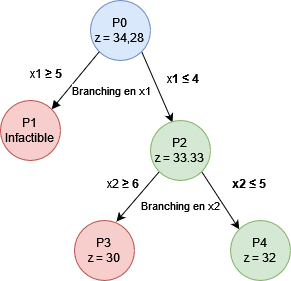

In [10]:
#Bonus: Resolución del problema entero con solver MILP 

#Resolución del problema relajado 
P = Model(Cbc.Optimizer)

@variable(P, x[1:2] >=0, Int)

@constraint(P, x[1]+3x[2] <= 20)
@constraint(P, 2x[1]-x[2] <= 4)
@objective(P, Max, 3*x[1]+4*x[2])
set_silent(P)

optimize!(P)


println("La solución al problema es ", value.(x))

println("La funcion objetivo toma un valor de ", objective_value(P))

La solución al problema es [4.0, 5.0]
La funcion objetivo toma un valor de 32.0


Notamos que la solución a la que llegamos con Branch and Bound es la misma de la del solver, por lo que confirmamos que es la óptima. 